In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium

### Création des dataframes pour chaque fichier csv avec pandas

In [2]:
#création de dataframe pour chaque fichier 'csv'
df_circuits = pd.read_csv('circuits.csv')
df_constructor_results = pd.read_csv('constructor_results.csv')
df_constructor_standings = pd.read_csv('constructor_standings.csv')
df_constructors = pd.read_csv('constructors.csv')
df_driver_standings = pd.read_csv('driver_standings.csv')
df_drivers = pd.read_csv('drivers.csv')
df_lap_times = pd.read_csv('lap_times.csv')
df_pit_stops = pd.read_csv('pit_stops.csv')
df_qualifying = pd.read_csv('qualifying.csv')
df_races = pd.read_csv('races.csv')
df_results = pd.read_csv('results.csv')
df_seasons = pd.read_csv('seasons.csv')
df_status = pd.read_csv('status.csv')

### Création d'une liste possedant tous les dataframes

In [3]:
list_df = [df_circuits,
          df_constructor_results,
          df_constructor_standings,
          df_constructors,
          df_driver_standings,
          df_drivers,
          df_lap_times,
          df_pit_stops,
          df_qualifying,
          df_races,
          df_results,
          df_seasons,
          df_status]

## Affichage des informations de chaque dataframes 

In [4]:
for i in list_df : i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     int64  
 8   url         77 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11820 entries, 0 to 11819
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  11820 non-null  int64  
 1   raceId                11820 non-null  int64  
 2   constructorId         11820 non-null  int64  
 3   points           

## Description des dataframes un à un

In [5]:
#dataframe sur les différents circuits
df_circuits.drop(columns=["circuitId", "url"],inplace=True)
df_circuits.head()

,circuitRef,name,location,country,lat,lng,alt
0,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10
1,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18
2,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7
3,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109
4,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130


In [6]:
#rename columns for easiest understanding
df_circuits.rename(columns = {'circuitRef':'Ref_circuit',
                             'location':'city',
                             'lat':'latitude',
                             'lng':'longitude',
                             'alt':'altitude'},
                    inplace = True)
# afficher les nouvelles entêtes
df_circuits.head()

,Ref_circuit,name,city,country,latitude,longitude,altitude
0,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10
1,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18
2,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7
3,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109
4,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130


In [7]:
#un peu de data viz 
#tout d'abord trier les circuits du moins élevé au plus élevé
df_circuits = df_circuits.sort_values(by=['altitude'])
df_circuits = df_circuits.reset_index()
df_circuits.drop(columns=["index"],inplace=True)
#df_circuits.drop(columns=["level_0"],inplace=True)
df_circuits.head()

,Ref_circuit,name,city,country,latitude,longitude,altitude
0,BAK,Baku City Circuit,Baku,Azerbaijan,40.3725,49.8533,-7
1,yeongam,Korean International Circuit,Yeongam County,Korea,34.7333,126.4170,0
2,sochi,Sochi Autodrom,Sochi,Russia,43.4057,39.9578,2
3,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,24.4672,54.6031,3
4,port_imperial,Port Imperial Street Circuit,New Jersey,USA,40.7769,-74.0111,4


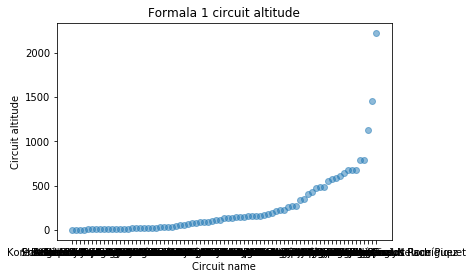

In [8]:
######graphe a modifier avec plus de detailles (rajouter une colonne continent, mettre diffrente couleur en fonction du continent, agradir le tableau pour avoir une absicse lisible)##### 
#graphe de description
plt.scatter(df_circuits['name'],df_circuits['altitude'], alpha=0.5)  # alpha chances the transparency
#titre et legendes
plt.title('Formala 1 circuit altitude')
plt.xlabel('Circuit name')
plt.ylabel('Circuit altitude')
#affichage du graph
plt.show()

A première vu le graph ci-dessus n'est pas très représentatif et compréhensible.
Pour rendre ce graph plus attractif,  nous allons créer une colonne qui donne le continent dans lequel se trouve le circuit.

In [9]:
#nous allons d'abord recuperer uniquement la colonne qui donne le pays
pays = df_circuits['country']
print("Il y a ligne", len(pays), "à la base")
#dans un second temps nous allons retirer les doublons 
#pays = set(pays)
pays = pays.drop_duplicates().reset_index()#gerons les duplications de pays comme dans un dataframe
pays = pays['country']
print("A present on voit qu'il y a", len(pays), "pays different dans en F1")

Il y a ligne 77 à la base
A present on voit qu'il y a 34 pays different dans en F1


A présent nous allons créer une liste qui regroupe tous le continent

In [10]:
continents = ['North_America', 'South_America', 'Africa', 'Asia', 'Oceania', 'Europe']

Nous allons maintenant créer un dictionnaire des continents avec les pays qui s'y trouvent

In [11]:
#dans cd dictionnaire la clé sera le pays et la value le continent pour des soucis pratiques
continents_dic = {
    'Azerbaijan' : 'Asia',
    'Korea' : 'Asia',
    'Russia' : 'Asia',
    'UAE' : 'Asia',
    'USA' : 'North_America',
    'Spain' : 'Europe',
    'China' : 'Asia',
    'Netherlands' : 'Europe',
    'Bahrain' : 'Asia',
    'Monaco' : 'Europe',
    'Argentina' : 'South_America',
    'Vietnam' : 'Asia',
    'Australia' : 'Oceania',
    'Canada' : 'North_America',
    'Saudi Arabia' : 'Asia',
    'South Africa' : 'Africa',
    'Singapore' : 'Asia',
    'Malaysia' : 'Asia',
    'Morocco' : 'Africa',
    'UK' : 'Europe',
    'Portugal' : 'Europe',
    'Belgium' : 'Europe',
    'Italy' : 'Europe',
    'Japan' : 'Asia',
    'Germany' : 'Europe',
    'France' : 'Europe',
    'Turkey' : 'Asia',
    'Sweden' : 'Europe',
    'India' : 'Asia',
    'Hungary' : 'Europe',
    'Switzerland' : 'Europe',
    'Austria' : 'Europe',
    'Brazil' : 'South_America',
    'Mexico' : 'North_America'
}
#representation des clee et value de 'continents_dic' 
print("Les clee de 'continents_dic' sont :\n",continents_dic.keys())
print('')
print("Les values de 'continents_dic' sont :\n",continents_dic.values())

Les clee de 'continents_dic' sont :
 dict_keys(['Azerbaijan', 'Korea', 'Russia', 'UAE', 'USA', 'Spain', 'China', 'Netherlands', 'Bahrain', 'Monaco', 'Argentina', 'Vietnam', 'Australia', 'Canada', 'Saudi Arabia', 'South Africa', 'Singapore', 'Malaysia', 'Morocco', 'UK', 'Portugal', 'Belgium', 'Italy', 'Japan', 'Germany', 'France', 'Turkey', 'Sweden', 'India', 'Hungary', 'Switzerland', 'Austria', 'Brazil', 'Mexico'])

Les values de 'continents_dic' sont :
 dict_values(['Asia', 'Asia', 'Asia', 'Asia', 'North_America', 'Europe', 'Asia', 'Europe', 'Asia', 'Europe', 'South_America', 'Asia', 'Oceania', 'North_America', 'Asia', 'Africa', 'Asia', 'Asia', 'Africa', 'Europe', 'Europe', 'Europe', 'Europe', 'Asia', 'Europe', 'Europe', 'Asia', 'Europe', 'Asia', 'Europe', 'Europe', 'Europe', 'South_America', 'North_America'])


Il faut maintenant un introduire les valeurs de 'continents_dic' dans une nouvelle colonne de 'df_circuits'

In [12]:
#fonctin en 1 ligne (lambda) permetant d'assigner les valeurs de la nouvelle colonnes 'continents en finction de 'pays' 
df_circuits['continents'] = df_circuits.apply(lambda row: continents_dic[row['country']], axis = 1)
df_circuits.head()#on peut visualiser dans le df ci-dessous la nouvelle colonne 'continents' qui concorde bien avec 'pays'

,Ref_circuit,name,city,country,latitude,longitude,altitude,continents
0,BAK,Baku City Circuit,Baku,Azerbaijan,40.3725,49.8533,-7,Asia
1,yeongam,Korean International Circuit,Yeongam County,Korea,34.7333,126.4170,0,Asia
2,sochi,Sochi Autodrom,Sochi,Russia,43.4057,39.9578,2,Asia
3,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,24.4672,54.6031,3,Asia
4,port_imperial,Port Imperial Street Circuit,New Jersey,USA,40.7769,-74.0111,4,North_America


## Emplacement géographique des circuits

Réalisation d'un script qui affichera l'empacement de chaque circuit sur la carte, ainsi qu'un symbole qui sera plus ou moins gros en fonction du nombre de course s'étant tenu sur celui-ci

In [15]:
##############TEST : pour verifier que le module fonctionne corectement##############
coords = (40.3725, 49.8533)
map = folium.Map(location=coords, tiles='OpenStreetMap', zoom_start=6)
map